In [1]:
# Code attribution: Yiyin Shen, Tyler Caraza-Harter
# Imports
import sklearn
import sklearn.linear_model
import numpy
import pandas
import scipy
import matplotlib.pyplot as plt

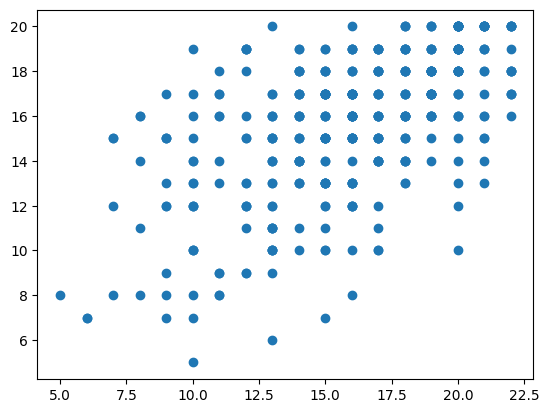

In [2]:
# Read the data and plot Exam 1 vs Exam 2
data = pandas.read_csv("NewGrades.csv")
x = data[["Exam1", "Project", "Lecture", "Quiz", "Lab"]]
y = data["Exam2"]
plt.scatter(x["Exam1"], y)

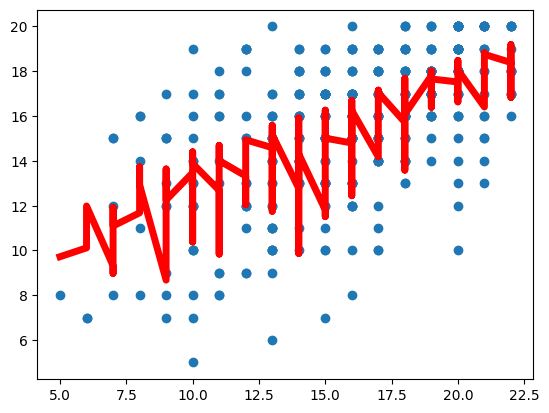

In [3]:
# Linear Regression and plot the predictions
reg = sklearn.linear_model.LinearRegression()
reg.fit(x, y)
y_pred = reg.predict(x)
plt.scatter(x["Exam1"], y)
plt.plot(x["Exam1"], y_pred, linewidth = 5, color = "red")

In [4]:
# Compare the weights from the fit and ones solved by least squares
x_design = numpy.hstack([x, numpy.transpose([1] * len(y)).reshape(-1, 1)])
w = scipy.linalg.lstsq(x_design, y)
[w[0], [reg.coef_, reg.intercept_]]

[array([ 0.39862583, -0.12153766,  0.52249226,  1.40052768, -0.58229703,
        -4.6815162 ]),
 [array([ 0.39862583, -0.12153766,  0.52249226,  1.40052768, -0.58229703]),
  -4.681516200142058]]

In [5]:
# Compare the weights from the fit and ones solved using linear algebra
w0 = scipy.linalg.solve(numpy.transpose(x_design) @ x_design, numpy.transpose(x_design) @ y)
[w0, [reg.coef_, reg.intercept_]]

[array([ 0.39862583, -0.12153766,  0.52249226,  1.40052768, -0.58229703,
        -4.6815162 ]),
 [array([ 0.39862583, -0.12153766,  0.52249226,  1.40052768, -0.58229703]),
  -4.681516200142058]]